# Algerian Forest Fires 

Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# File ID from your Google Drive link
file_id = '1uIFPOVtCHnWeD-NBmWNuY9khETojk3xq'

# Create the direct download URL
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Read the dataset into a pandas DataFrame
dataset = pd.read_csv(download_url,header=1)

In [3]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
dataset.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [6]:
## missing values
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [10]:
df[['Region']]=df[['Region']].astype(int)

In [11]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [12]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [13]:
## Removing the null values
df=df.dropna().reset_index(drop=True)

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [15]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [17]:
##remove the 122nd row
df=df.drop(122).reset_index(drop=True)

In [18]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [19]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [20]:
## fix spaces in columns names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


 Change the required columns into int datatypes

In [22]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [23]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [25]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


Changing the other columns to float data datatype

In [26]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [27]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [28]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [30]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [31]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [32]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [33]:
type(df)

pandas.core.frame.DataFrame

In [34]:
## Let ave the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

In [35]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


# EDA

In [36]:
#Droping Year features
df1 = df.drop(['day','month','year'], axis=1)

In [37]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)

In [38]:
# Check counts
df1.Classes.value_counts()

Classes
1    241
0      2
Name: count, dtype: int64

**Visualization of Distribution**

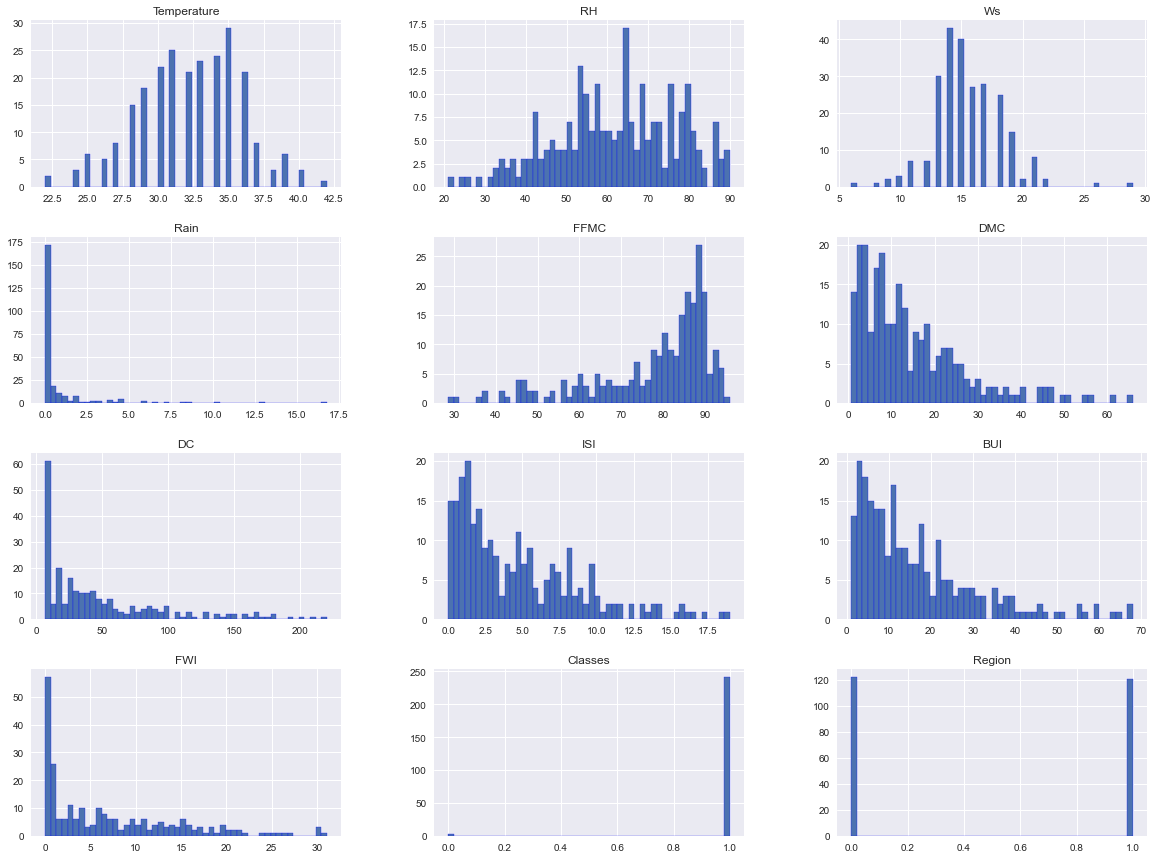

In [39]:
# PLot density plot for all features
plt.style.use('seaborn')
df1.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [40]:
# Ensure class labels are consistent
df['Classes'] = df['Classes'].str.strip().str.lower()

# Percentage for PieChart
percentage = df.Classes.value_counts(normalize=True)*100
percentage

Classes
fire        56.378601
not fire    43.621399
Name: proportion, dtype: float64

**Charts**

In [41]:
#plotting PieChart
import matplotlib.pyplot as plt
classeslabels = ["FIRE", "NOT FIRE"]

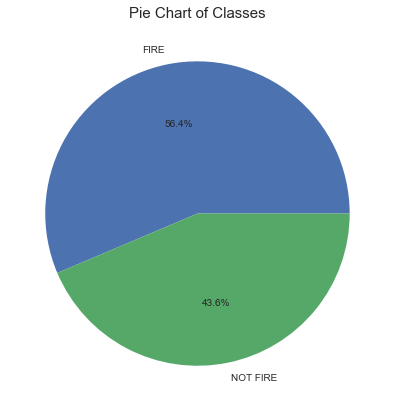

In [42]:
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = classeslabels,autopct='%1.1f%%')
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

<AxesSubplot:>

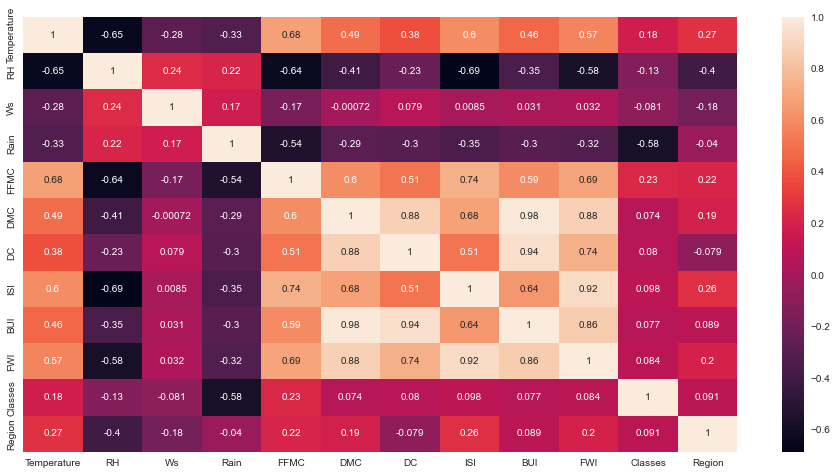

In [43]:
plt.figure(figsize=(16,8))
sns.heatmap(df1.corr(),annot=True)

**Canadian Forest Fire Weather Index (FWI) System**

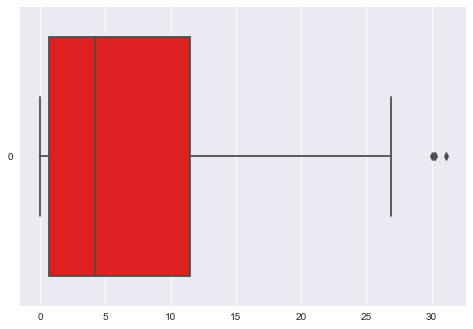

In [44]:
#Boxplot
ax = sns.boxplot(df['FWI'], color= 'red',orient="h")

**Monthwise Fire Analysis**

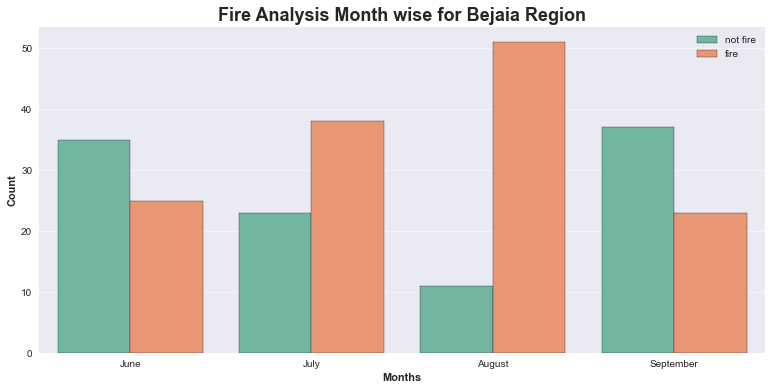

In [45]:
dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

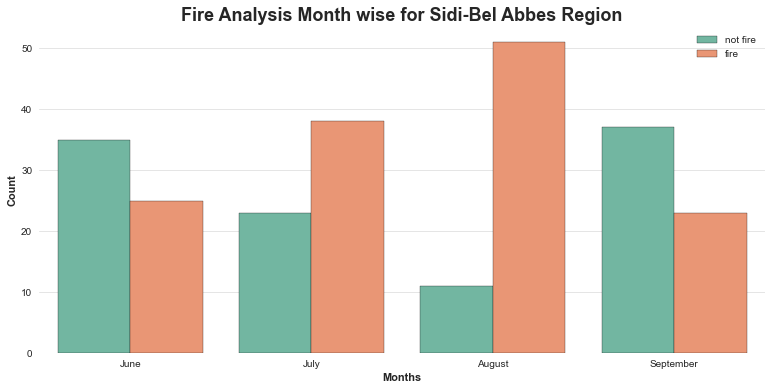

In [46]:
dftemp= df.loc[df['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September'])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

## Exploratory Data Analysis (EDA) on all Features

In [47]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [48]:
def barchart(feature,xlabel):
    plt.figure(figsize=[14,8])
    by_feature =  df1.groupby([feature], as_index=False)['Classes'].sum()
    ax = sns.barplot(x=feature, y="Classes", data=by_feature[[feature,'Classes']], estimator=sum)
    ax.set(xlabel=xlabel, ylabel='Fire Count')

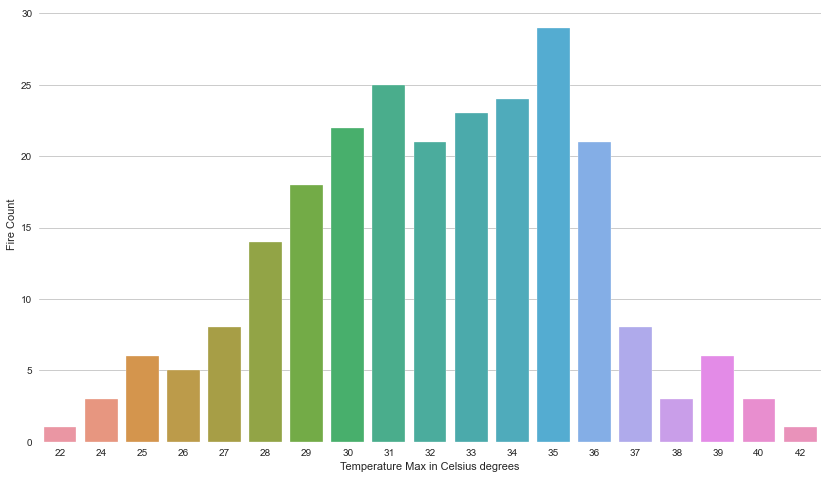

In [49]:
barchart('Temperature','Temperature Max in Celsius degrees')

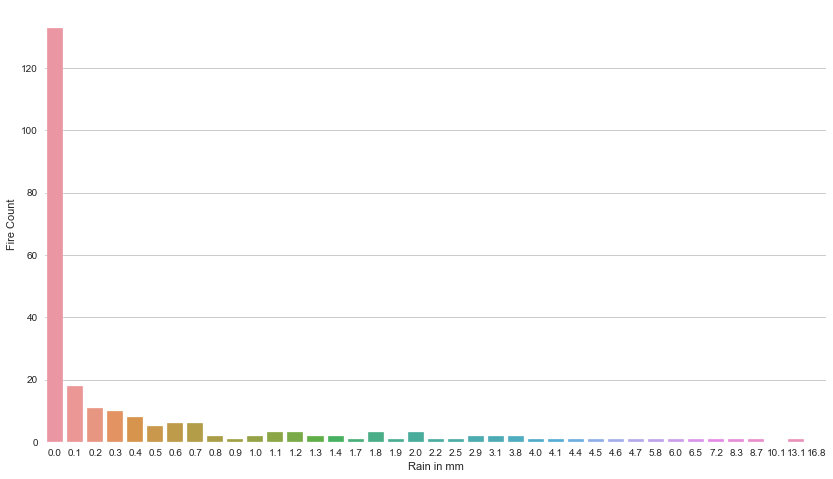

In [50]:
barchart('Rain', 'Rain in mm')

**Fine Fuel Moisture Code (FFMC) index**

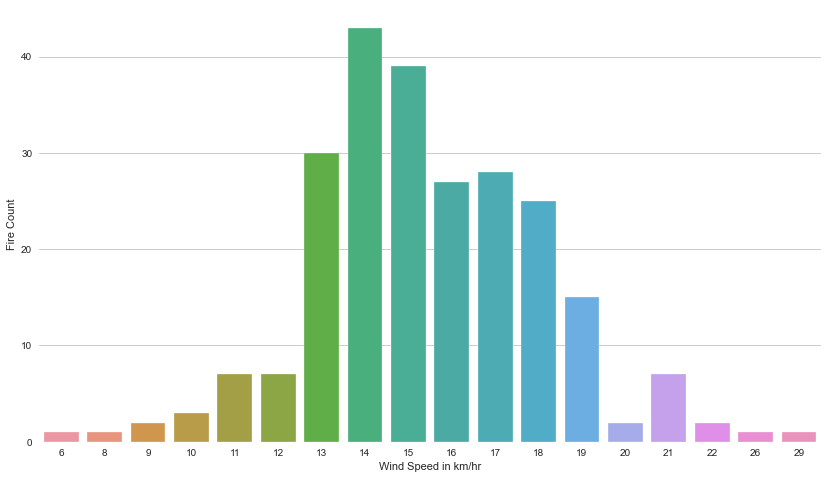

In [51]:
barchart('Ws', 'Wind Speed in km/hr')

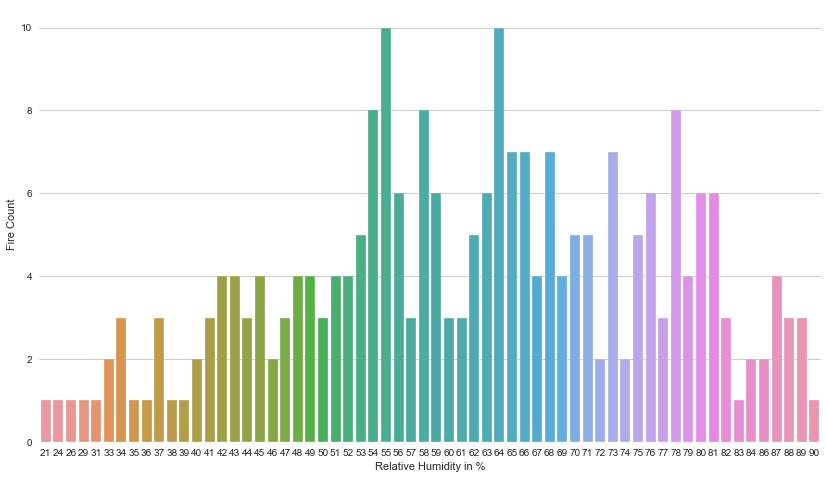

In [52]:
barchart('RH','Relative Humidity in %')

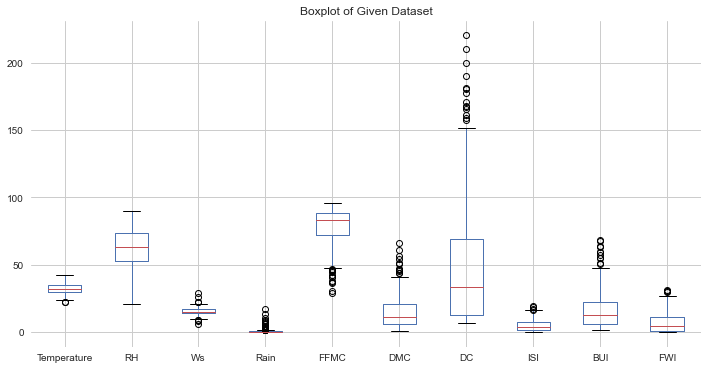

In [53]:
dftemp = df1.drop(['Classes', 'Region'], axis=1)
fig = plt.figure(figsize =(12, 6))
ax = dftemp.boxplot()
ax.set_title("Boxplot of Given Dataset")
plt.show()

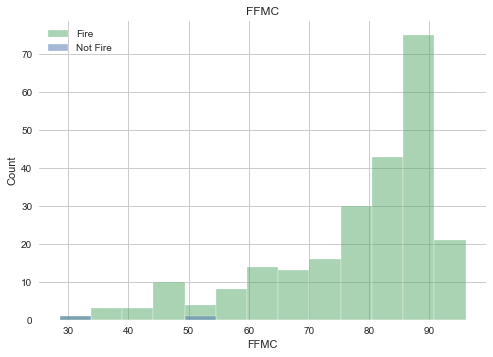

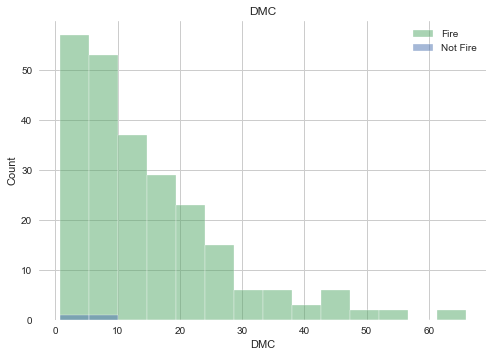

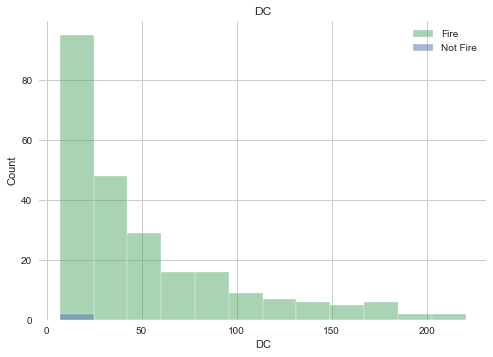

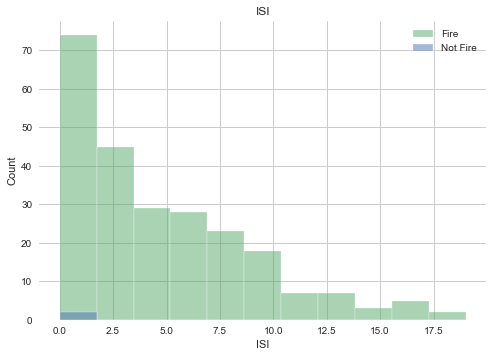

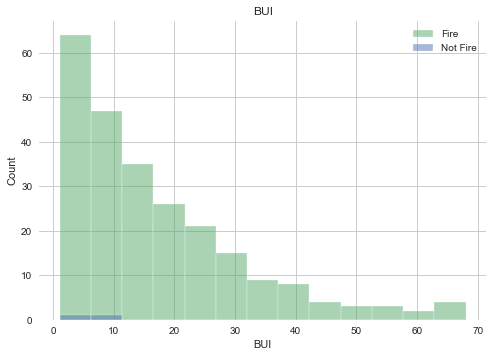

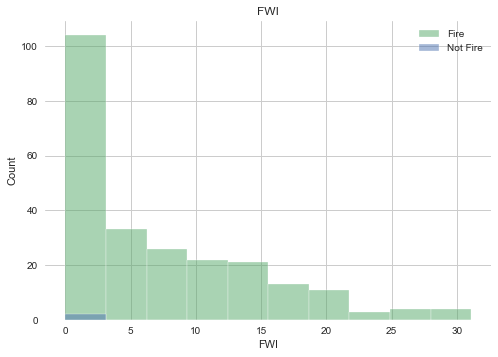

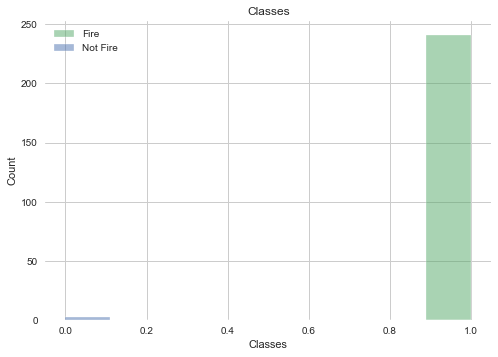

In [54]:
dftemp = dftemp = df1.drop(['Region','Temperature','Rain','Ws','RH'], axis=1)
for feature in dftemp:
    sns.histplot(data = dftemp,x=feature, hue = 'Classes')
    plt.legend(labels=['Fire','Not Fire'])
    plt.title(feature)
    plt.show()

**Weather System Report**

* **Temperature** Highest Fire counts happened between **30-37 degree Celsius**
* **Rain** Highest Fire counts happened when there was no rain to very less rain ie. **0.0 to 0.3.**
* **Wind Speed** highest Fire count happened when the wind speed were between **13 to 19 Km/hr.**
* **Relative Humidity** highest fire count happened when the RH is between **50 to 80%.**

**FWI System Components Report**

FWI (Canadian Forest Fire Weather Index)
* **Fine Fuel Moisture Code (FFMC) index** which ranges between *28.6 to 92.5*,
    here **above 75** has higher chance of Forest fires.
    
* **Duff Moisture Code (DMC) index** which ranges between *1.1 to 65.9*,
    here 1.1-10 has lower chance of Forest fires whereas above **10-30 DMC** has very high evidence of Forest fires in past.
    
* **Drought Code (DC) index** which ranges between *7 to 220.4*,
    here 0-25 is safe and has lower chance of Forest fires whereas range **above 25 DC** has higher chance of forest fires.
    
* **Initial Spread Index (ISI) index** which ranges between *0 to 18*,
    here 0-3 has lower Forest fires and **above 3 ISI** has higher chance of Forest fires.
    
* **Buildup Index (BUI) index** which ranges between *1.1 to 68*,
    here 1.1 to 10 has lower Forest fire chance and **above 10 BUI has** higher chance of forest fires.
    
* **Fire Weather Index (FWI) Index** which ranges between *1 to 31.1*,
    here 0-3 has lower chance of Forest fires and **3-25 FWI** has higher chance of forest fires.

## Model Training

**Ridge, Lasso & Elastic Net**

In [62]:
import pandas as pd
df=pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [63]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [64]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [65]:
##drop month,day and yyear
df.drop(['day','month','year'],axis=1,inplace=True)

In [66]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [67]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [68]:
## Encoding
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [69]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [70]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [71]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [72]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [73]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [74]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [75]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [76]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot:>

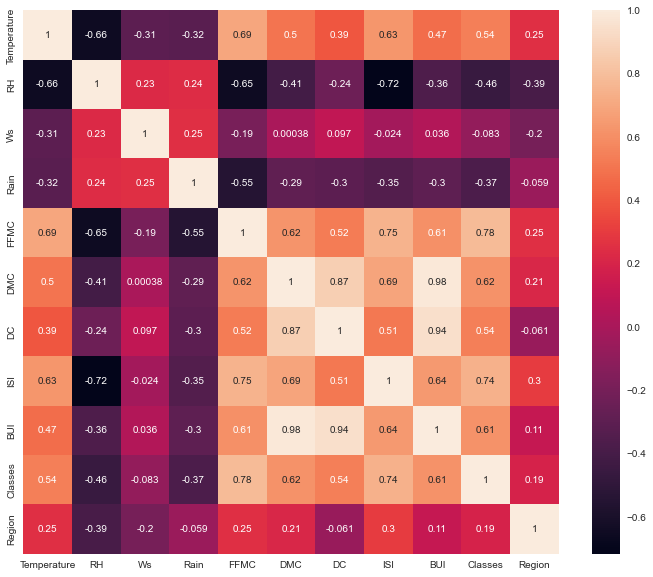

In [77]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [78]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [79]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [80]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [81]:
corr_features

{'BUI', 'DC'}

In [82]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

**Feature Scaling Or Standardization**

In [83]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [84]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

**Box Plots To understand Effect Of Standard Scaler**

Text(0.5, 1.0, 'X_train After Scaling')

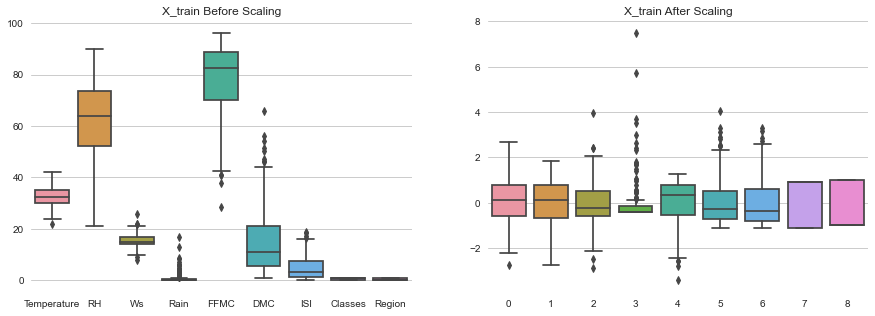

In [86]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

**Linear Regression Model**

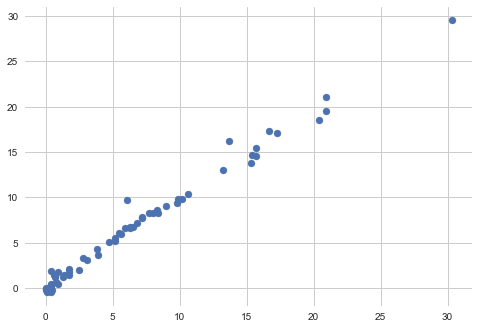

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

**Lasso Regression**

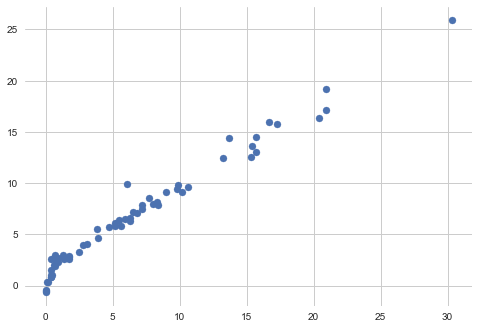

In [88]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

**Cross Validation Lasso**

In [89]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

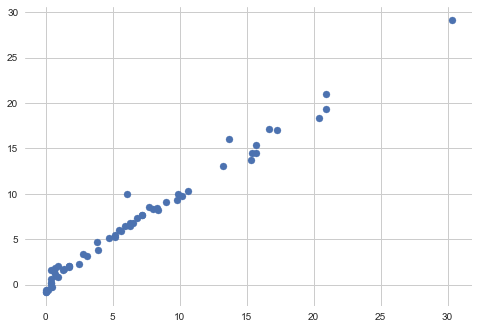

In [90]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

**Ridge Regression model**

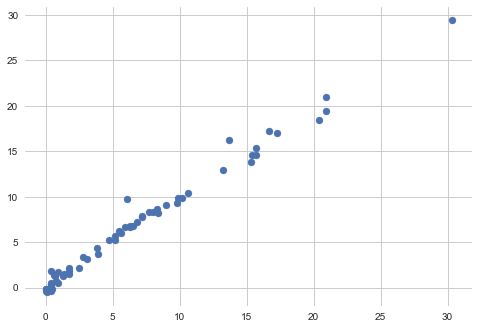

In [91]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

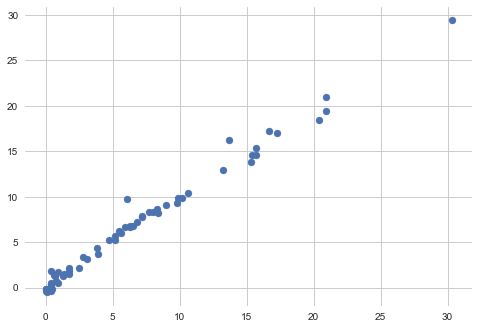

In [92]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [93]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

**Elasticnet Regression**

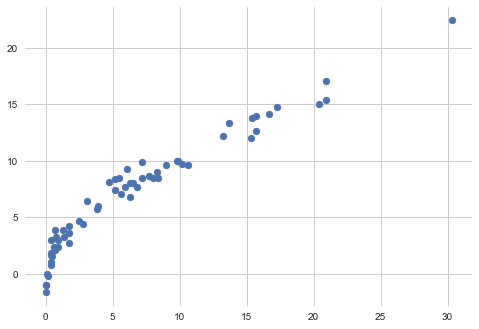

In [94]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

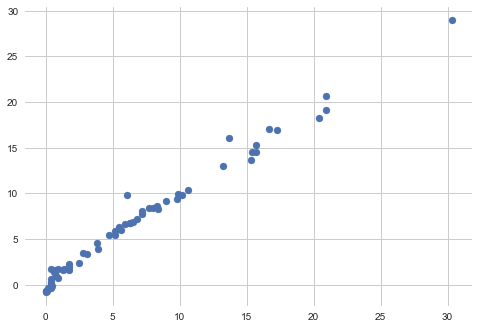

In [95]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [96]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11